<a href="https://colab.research.google.com/github/Provatiscus/Coursera_Capstone/blob/master/Capstone_Week_3_third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will be mainly used for the capstone project.


In [1]:
import numpy as np
import pandas as pd

In [2]:
print( "Hello Capstone Project Course!")


Hello Capstone Project Course!


We import BeautifulSoup that we will use to scrape the Wikipedia page
We import urllib.request which will be use to download the Wikipedia page html code

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
html = urlopen("http://www.google.com/").read()
#print(html)
quote_page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urlopen(quote_page)
soup = BeautifulSoup(page, 'html.parser')


In [4]:
import pandas as pd
import numpy as np

Creating the dataframe df

In [5]:
df = pd.DataFrame(columns = ["Postal Code", "Borough", "Neighborhood"])
df

Empty DataFrame
Columns: [Postal Code, Borough, Neighborhood]
Index: []

We are filling the dataframe with a single line of code thanks to BeautifulSoup

In [6]:
for i, tr in enumerate(soup.find_all('tr')[1:-5]):
  df.loc[i] = [tr.find_all('td')[i].text.replace('\n', '') for i in range(3)]

In [7]:
df.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

We replace the 'Not assigned with zeros'.

In [8]:
df.replace('Not assigned', 0, inplace = True)
df.head()

Postal Code           Borough               Neighborhood
0         M1A                 0                          0
1         M2A                 0                          0
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

We drop all lines with the Borough not assigned and we verify that all the Neighbourhoods are filled

In [9]:
df = df.loc[df['Borough']!=0]
print((df["Neighborhood"] == 0).sum())
df.reset_index(inplace = True)
df = df.drop('index', axis = 1)
df.head()

0


Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

We print the shape of the dataframe as expected

In [10]:
print( "the shape of the DataFrame is: ", df.shape)

the shape of the DataFrame is:  (103, 3)


#Second Part

Mounting my Drive as I am on Google Colab

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd drive/MyDrive/Capstone

/content/drive/MyDrive/Capstone


Taking the file from the drive

In [13]:
geo_df = pd.read_csv("Geospatial_Coordinates.csv")

Joining the two dataframe on Postal Code

In [14]:
df2 = df.join(geo_df.set_index('Postal Code'), on = 'Postal Code')
df2

Postal Code           Borough  ...   Latitude  Longitude
0           M3A        North York  ...  43.753259 -79.329656
1           M4A        North York  ...  43.725882 -79.315572
2           M5A  Downtown Toronto  ...  43.654260 -79.360636
3           M6A        North York  ...  43.718518 -79.464763
4           M7A  Downtown Toronto  ...  43.662301 -79.389494
..          ...               ...  ...        ...        ...
98          M8X         Etobicoke  ...  43.653654 -79.506944
99          M4Y  Downtown Toronto  ...  43.665860 -79.383160
100         M7Y      East Toronto  ...  43.662744 -79.321558
101         M8Y         Etobicoke  ...  43.636258 -79.498509
102         M8Z         Etobicoke  ...  43.628841 -79.520999

[103 rows x 5 columns]

In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df2['Borough'].unique()),
        len(df2['Neighborhood'].unique())
    )
)

The dataframe has 10 boroughs and 99 neighborhoods.


In [16]:
df2.groupby('Neighborhood').mean()

Latitude  Longitude
Neighborhood                                                         
Agincourt                                        43.794200 -79.262029
Alderwood, Long Branch                           43.602414 -79.543484
Bathurst Manor, Wilson Heights, Downsview North  43.754328 -79.442259
Bayview Village                                  43.786947 -79.385975
Bedford Park, Lawrence Manor East                43.733283 -79.419750
...                                                    ...        ...
Willowdale, Willowdale West                      43.782736 -79.442259
Woburn                                           43.770992 -79.216917
Woodbine Heights                                 43.695344 -79.318389
York Mills West                                  43.752758 -79.400049
York Mills, Silver Hills                         43.757490 -79.374714

[99 rows x 2 columns]

# Third part

We make the required imports

In [46]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

We look for a single Venue to print the map as a test. The map is not displayed by default on GitHub

In [18]:
def get_venues(row):
  row = 1
  latitude = df2['Latitude'][row]
  longitude = df2['Longitude'][row]
  url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
  results = requests.get(url).json()
  results
  items = results['response']['groups'][0]['items']
  return items


In [19]:
row = 1
latitude = df2['Latitude'][row]
longitude = df2['Longitude'][row]
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco

for lat, lng, label in zip(df2['Latitude'], df2['Longitude'], df2['Postal Code']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)


venues_map

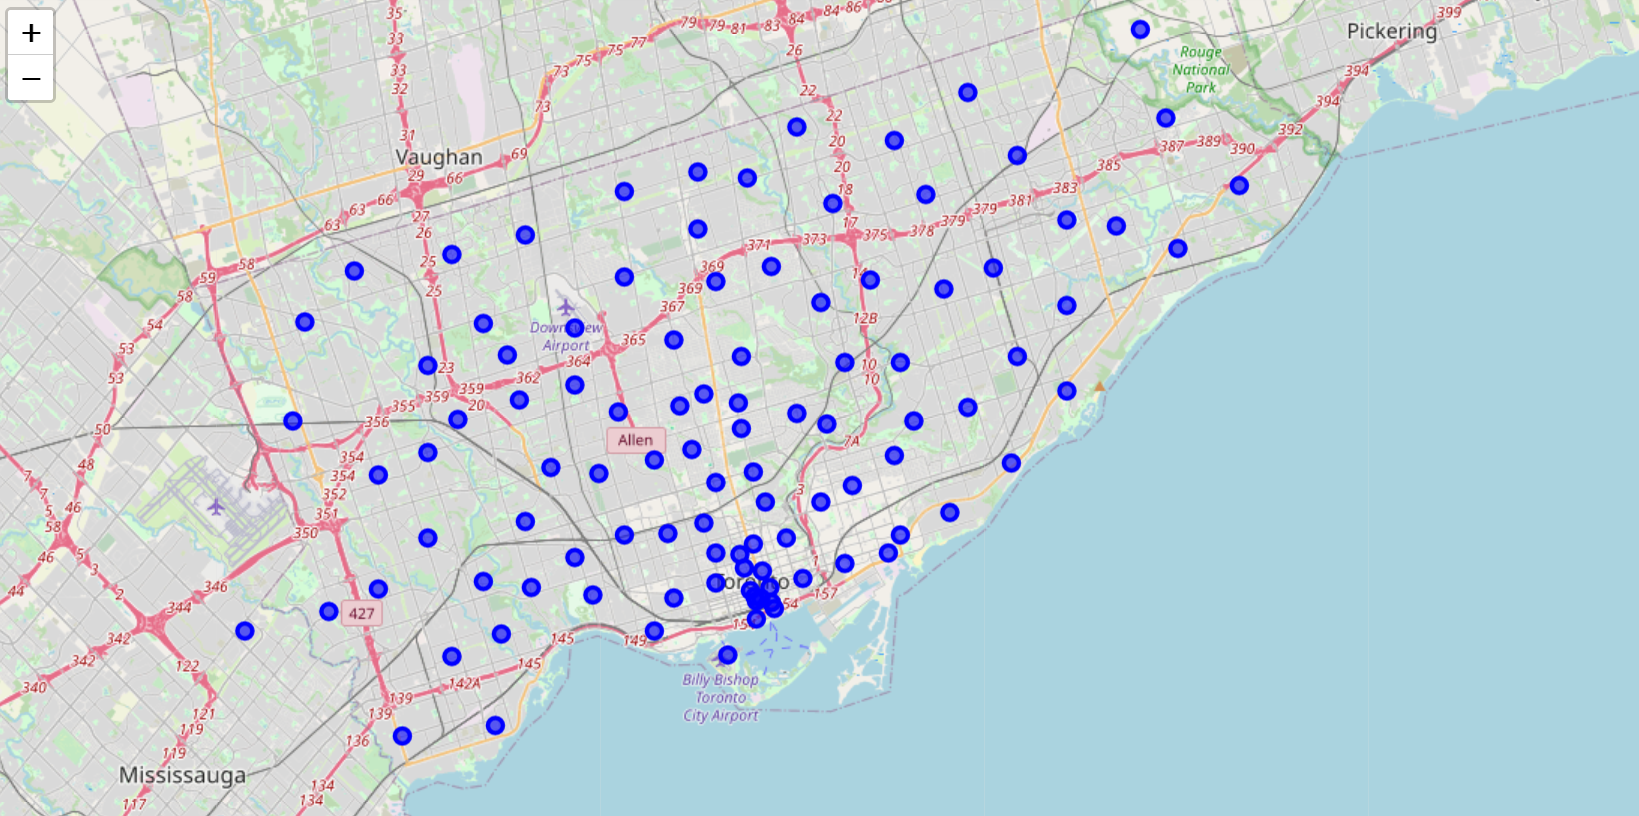

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

I take the different functions from the lab to get all the NearbyVenues for each Neighborhood

In [47]:
toronto_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [22]:
toronto_venues.shape

(1327, 7)

We regroup all the venues by Neighborhood

In [23]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               3   
Alderwood, Long Branch                                                  8   
Bathurst Manor, Wilson Heights, Downsview North                        20   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      23   
Berczy Park                                                            30   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           22   
Business reply mail Processing Centre, South Ce...                     13   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Caledonia-Fairbanks                                                     4   
Canada Post Gateway Processing Centre                                  13   
Cedarbrae                                                               9   
Central Bay Street                                                     30   
Christie                                                               16   
Church and Wellesley                                                   30   
Clarks Corners, Tam O'Shanter, Sullivan                                14   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                         30   
Davisville                                                             30   
Davisville North                                                        9   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills                                                              26   
Dorset Park, Wexford Heights, Scarborough Town ...                      6   
Downsview                                                              15   
Dufferin, Dovercourt Village                                           18   
East Toronto, Broadview North (Old East York)                           5   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      8   
Fairview, Henry Farm, Oriole                                           30   
First Canadian Place, Underground city                                 30   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                               30   
Glencairn                                                               4   
Golden Mile, Clairlea, Oakridge                                         7   
Guildwood, Morningside, West Hill                                       8   
Harbourfront East, Union Station, Toronto Islands                      30   
High Park, The Junction South                                          24   
Hillcrest Village                                                       5   
Humber Summit                                                           2   
Humberlea, Emery                                                        2   
Humewood-Cedarvale                                                      3   
India Bazaar, The Beaches West                                         19   
Kennedy Park, Ionview, East Birchmount Park                             5   
Kensington Market, Chinatown, Grange Park                              30   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                                       15   
Lawrence Park                                                           4   
Leaside                                                                30   
Little Portugal, Trinity                                               30   
Malvern, Rouge                                                          1   
Milliken, Agincourt North, Steeles East, L'Amor.

In [24]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


We one_hot encode the dataframe to ease the following

In [25]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Airport  \
0            0                  0               0        0   
1            0                  0               0        0   
2            0                  0               0        0   
3            0                  0               0        0   
4            0                  0               0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Basketball Stadium  Beer Bar  Beer Store  \
0     0    0               0                   0         0           0   
1     0    0               0                   0         0           0   
2     0    0               0                   0         0           0   
3     0    0               0                   0         0           0   
4     0    0               0                   0         0           0   

   Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0          0       0              0          0         0   
1                   0          0       0              0          0         0   
2                   0          0       0              0          0         0   
3                   0          0       0              0          0         0   
4                   0          0       0              0          0         0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Burger Joint  \
0               0        0            0                0             0   
1               0        0            0                0             0   
2               0        0            0                0             0   
3               0        0            0                0             0   
4               0        0            0                0             0   

   Burrito Place  Bus Line  Bus Station  Business Service  Butcher  Café  \
0              0         0            0                 0        0     0   
1              0         0            0                 0        0     0   
2              0         0            0                 0        0     0   
3              0         0            0                 0        0     0   
4              0         0            0      

In [26]:
toronto_onehot.shape

(1327, 235)

In [51]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped

In [28]:
toronto_grouped.shape

(97, 235)

In [29]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.33
1             Breakfast Spot  0.33
2  Latin American Restaurant  0.33
3                Yoga Studio  0.00
4             Medical Center  0.00


----Alderwood, Long Branch----
         venue  freq
0  Pizza Place  0.25
1          Gym  0.12
2     Pharmacy  0.12
3          Pub  0.12
4  Coffee Shop  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0         Bank  0.10
1  Coffee Shop  0.10
2  Pizza Place  0.05
3  Gas Station  0.05
4  Bridal Shop  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Men's Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Pizza Place  0.09
1         Coffee Shop  0.09
2  Italian Restaurant  0.09
3      Sandwich Place  0.09
4                 Pub  0.04


----Berczy Park

We want to keep the most common venues per neighborhood to classify them

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt                Lounge   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North           Coffee Shop   
3                                  Bayview Village                  Bank   
4                Bedford Park, Lawrence Manor East           Pizza Place   

       2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0  Latin American Restaurant        Breakfast Spot         Women's Store   
1                   Pharmacy           Coffee Shop                   Pub   
2                       Bank           Pizza Place        Ice Cream Shop   
3         Chinese Restaurant                  Café   Japanese Restaurant   
4                Coffee Shop        Sandwich Place    Italian Restaurant   

  5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0           Escape Room     Electronics Store  Eastern European Restaurant   
1          Skating Rink                   Gym               Sandwich Place   
2              Pharmacy     Mobile Phone Shop                   Restaurant   
3         Women's Store      Department Store            Electronics Store   
4               Butcher                  Café                   Restaurant   

         8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
0                    Drugstore            Donut Shop                  Dog Run  
1          Distribution Center        Discount Store                    Diner  
2    Middle Eastern Restaurant        Sandwich Place            Deli / Bodega  
3  Eastern European Restaurant             Drugstore               Donut Shop  
4                          Pub              Pharmacy  Comfort Food Restaurant

Let's create the kmean algorithm

In [52]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 2], dtype=int32)

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df2

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  43.753259 -79.329656             0.0                  Park   
1  43.725882 -79.315572             0.0          Hockey Arena   
2  43.654260 -79.360636             0.0           Coffee Shop   
3  43.718518 -79.464763             0.0        Clothing Store   
4  43.662301 -79.389494             0.0           Coffee Shop   

        2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
0  Construction & Landscaping     Food & Drink Shop          Women's Store   
1                 Pizza Place           Coffee Shop  Portuguese Restaurant   
2                      Bakery                  Park         Breakfast Spot   
3      Furniture / Home Store   Sporting Goods Shop            Coffee Shop   
4            Sushi Restaurant                 Diner    Japanese Restaurant   

  5th Most Common Venue        6th Most Common Venue  \
0         Deli / Bodega  Eastern European Restaurant   
1     French Restaurant                 Intersection   
2                   Pub                         Café   
3    Miscellaneous Shop                     Boutique   
4                  Bank                          Bar   

        7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0                   Drugstore            Donut Shop                Dog Run   
1  Financial or Legal Service         Women's Store          Deli / Bodega   
2                  Restaurant        Chocolate Shop  Performing Arts Venue   
3       Vietnamese Restaurant           Event Space      Accessories Store   
4                    Beer Bar         Smoothie Shop    Distribution Center   

  10th Most Common Venue  
0    Distribution Center  
1       Department Store  
2     Mexican Restaurant  
3             Donut Shop  
4            Yoga Studio

In [34]:
toronto_merged.dropna(inplace = True)

In [35]:
toronto_merged["Cluster Labels"] = toronto_merged["Cluster Labels"].astype(int)

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

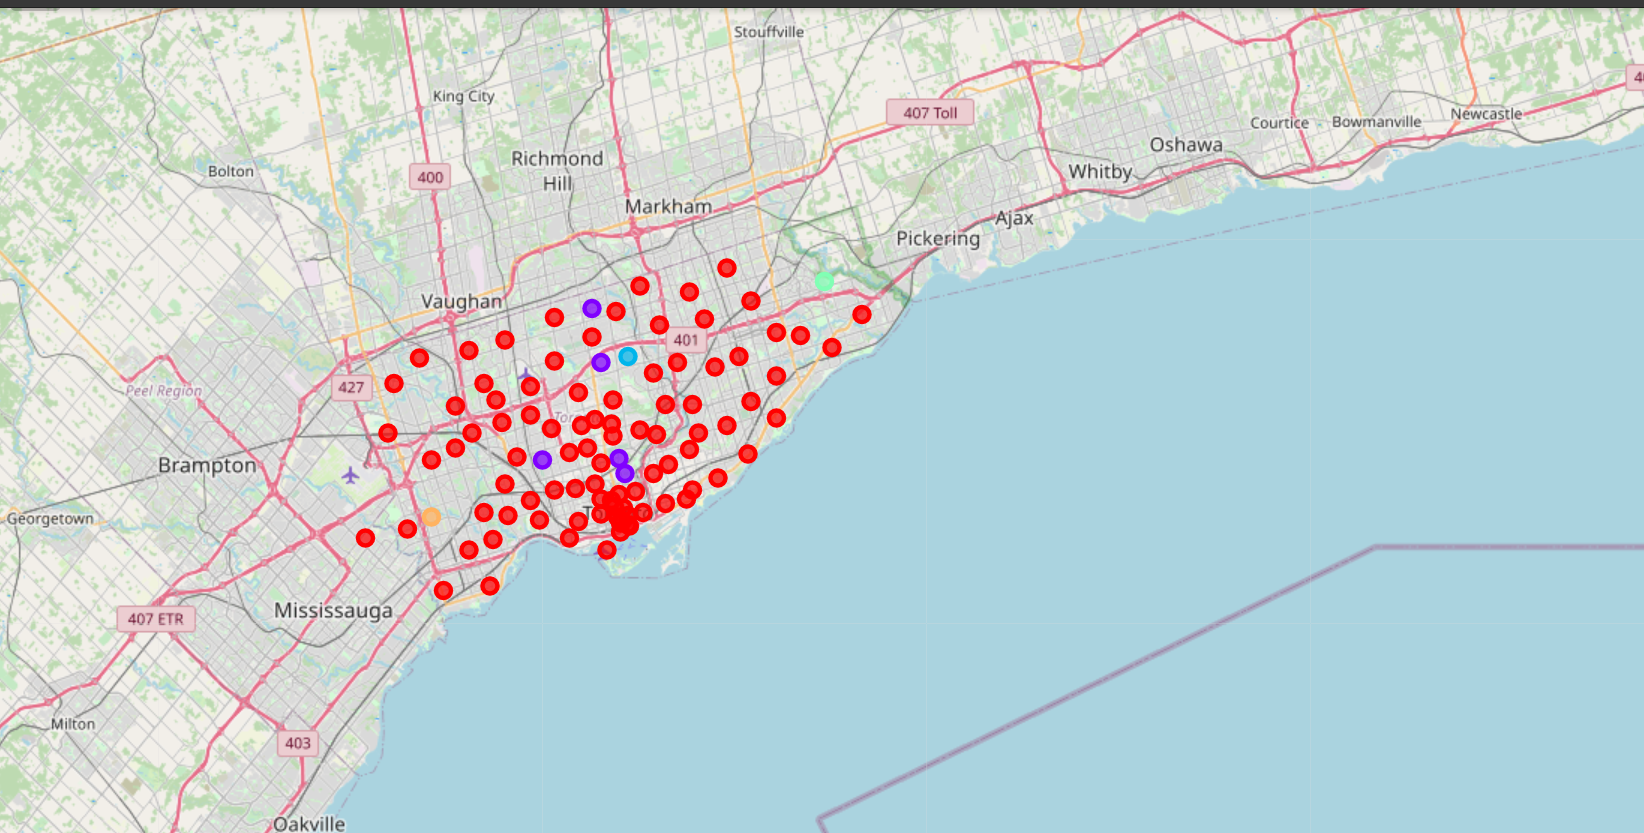

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0          North York               0                  Park   
1          North York               0          Hockey Arena   
2    Downtown Toronto               0           Coffee Shop   
3          North York               0        Clothing Store   
4    Downtown Toronto               0           Coffee Shop   
7          North York               0                   Gym   
8           East York               0           Pizza Place   
9    Downtown Toronto               0                  Café   
10         North York               0                  Park   
12        Scarborough               0                   Bar   
13         North York               0                   Gym   
14          East York               0          Skating Rink   
15   Downtown Toronto               0                  Café   
16               York               0                 Field   
17          Etobicoke               0          Liquor Store   
18        Scarborough               0     Electronics Store   
19       East Toronto               0     Health Food Store   
20   Downtown Toronto               0          Cocktail Bar   
22        Scarborough               0           Coffee Shop   
23          East York               0           Coffee Shop   
24   Downtown Toronto               0           Coffee Shop   
25   Downtown Toronto               0         Grocery Store   
26        Scarborough               0    Athletics & Sports   
27         North York               0    Athletics & Sports   
28         North York               0           Coffee Shop   
29          East York               0     Indian Restaurant   
30   Downtown Toronto               0           Coffee Shop   
31       West Toronto               0              Pharmacy   
32        Scarborough               0            Playground   
33         North York               0        Clothing Store   
34         North York               0        Massage Studio   
35          East York               0          Intersection   
36   Downtown Toronto               0                  Café   
37       West Toronto               0                   Bar   
38        Scarborough               0           Coffee Shop   
39         North York               0                  Bank   
40         North York               0         Grocery Store   
41       East Toronto               0      Greek Restaurant   
42   Downtown Toronto               0                  Café   
43       West Toronto               0                  Café   
44        Scarborough               0                Bakery   
46         North York               0         Grocery Store   
47       East Toronto               0                  Park   
48   Downtown Toronto               0                  Café   
49         North York               0                  Park   
50         North York               0                   Gym   
51        Scarborough               0                 Motel   
53         North York               0         Grocery Store   
54       East Toronto               0           Coffee Shop   
55         North York               0           Pizza Place   
56               York               0        Sandwich Place   
57         North York               0           Fabric Shop   
58        Scarborough               0       College Stadium   
59         North York               0      Ramen Restaurant   
60         North York               0         Grocery Store   
61    Central Toronto               0      Business Service   
62    Central Toronto               0                Garden   
63               York               0           Pizza Place   
64               York               0     Convenience Store   
65        Scarborough               0     Indian Restaurant   
67    Central Toronto               0     Food & Drink Shop   
68    Central Toronto               0      Sushi Restaurant   
69       West Toronto               0       T

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
21              York               1                  Park   
52        North York               1                  Park   
66        North York               1                  Park   
83   Central Toronto               1                  Park   
91  Downtown Toronto               1                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
21         Women's Store                  Pool          Dance Studio   
52         Women's Store          Dance Studio     Electronics Store   
66     Convenience Store         Women's Store         Deli / Bodega   
83         Women's Store          Dance Studio     Electronics Store   
91            Playground                 Trail           Curling Ice   

          5th Most Common Venue        6th Most Common Venue  \
21  Eastern European Restaurant                    Drugstore   
52  Eastern European Restaurant                    Drugstore   
66            Electronics Store  Eastern European Restaurant   
83  Eastern European Restaurant                    Drugstore   
91  Eastern European Restaurant                    Drugstore   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
21            Donut Shop               Dog Run   Distribution Center   
52            Donut Shop               Dog Run   Distribution Center   
66             Drugstore            Donut Shop               Dog Run   
83            Donut Shop               Dog Run   Distribution Center   
91            Donut Shop               Dog Run   Distribution Center   

   10th Most Common Venue  
21         Discount Store  
52         Discount Store  
66    Distribution Center  
83         Discount Store  
91         Discount Store

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
45  North York               2   Martial Arts School         Women's Store   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
45         Deli / Bodega     Electronics Store  Eastern European Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
45             Drugstore            Donut Shop               Dog Run   

   9th Most Common Venue 10th Most Common Venue  
45   Distribution Center         Discount Store

In [45]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6  Scarborough               3  Fast Food Restaurant         Women's Store   

  3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
6         Deli / Bodega     Electronics Store  Eastern European Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6             Drugstore            Donut Shop               Dog Run   

  9th Most Common Venue 10th Most Common Venue  
6   Distribution Center         Discount Store

In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels      1st Most Common Venue  \
11  Etobicoke               4  Middle Eastern Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
11         Women's Store         Deli / Bodega     Electronics Store   

          5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
11  Eastern European Restaurant             Drugstore            Donut Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
11               Dog Run   Distribution Center         Discount Store